In [1]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Yahoo Finance Library

import yfinance as yf

In [3]:
# Downloading historical data

data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
data = data[['Close']]
data.dropna(inplace=True)

C:\Users\chitr\AppData\Local\Temp\ipykernel_3956\643956215.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [4]:
# Overview of the data

data.head()

Price,Close
Ticker,AAPL
Date,
2015-01-02,24.288584
2015-01-05,23.604330
2015-01-06,23.606556
2015-01-07,23.937569
2015-01-08,24.857302


In [5]:
# Creating lag feature

data['Prediction'] = data['Close'].shift(-1)
data.dropna(inplace=True)

In [6]:
# Defining Features and Labels

X = data[['Close']].values[:-1]
y = data['Prediction'].values[:-1]

In [7]:
# Train test Split of data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lr= LinearRegression()

# Training the data
lr.fit(X_train, y_train)

# Data prediction
lr_pred= lr.predict(X_test)

In [9]:
# Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression MSE:", mean_squared_error(y_test, lr_pred))
print("Linear Regression R2 Score:", r2_score(y_test, lr_pred))


Linear Regression MSE: 7.7652949375734375
Linear Regression R2 Score: 0.9772658636412609


In [10]:
# Random Forest 

from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()

# Training the data
rf.fit(X_train, y_train)

# Data prediction
rf_pred= rf.predict(X_test)

In [11]:
# Model Evaluation

print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest R2 Score:", r2_score(y_test, rf_pred))

Random Forest MSE: 42.61238903961458
Random Forest R2 Score: 0.8752454516169398


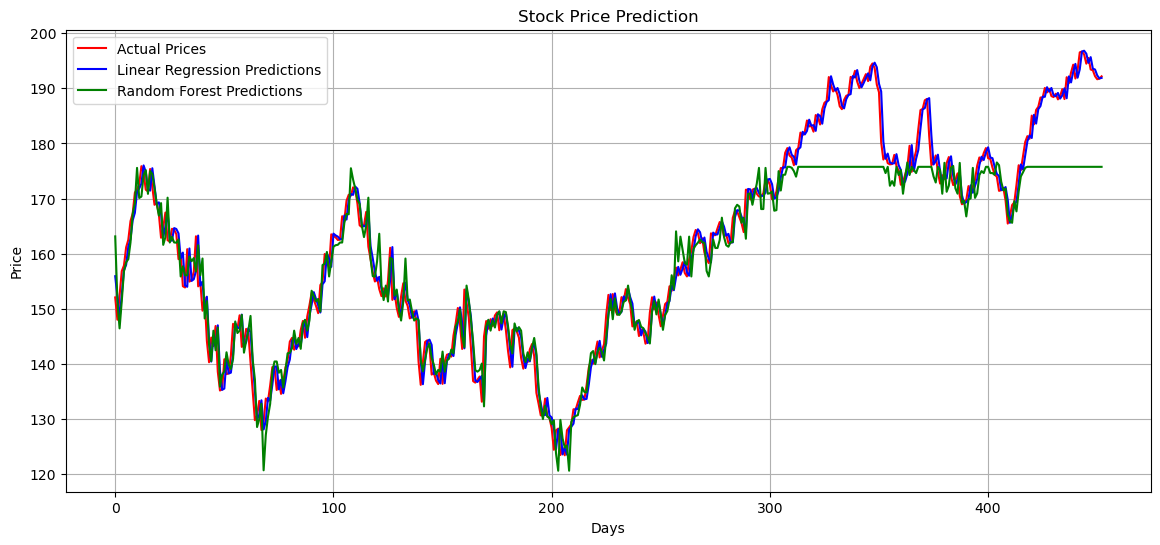

In [12]:
# Data Visualisation

plt.figure(figsize=(14, 6))

# Actual CLosing Price
plt.plot(y_test, label='Actual Prices', color='red')

# Linear Regression Prediction
plt.plot(lr_pred, label='Linear Regression Predictions', color='blue')

# Random Forest Prediction
plt.plot(rf_pred, label='Random Forest Predictions', color='green')

plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
